# SAR image pairs with changes
In this second example we will show how to create SAR images. A standard use case is change detection and geomockimages can help with that as well. It is possible to introduce small changes in pairs of mock images that then can be used to do some baseline tests for (Amplitude-) change detection.

We will start with a SAR image with one polarization (band).

In [1]:
from pathlib import Path
import numpy as np
import rasterio as rio
from rasterio.plot import show
from rasterio.transform import from_origin
from geomockimages.imagecreator import GeoMockImage

In [2]:
sar_img1, _ = GeoMockImage(
    300,
    200,
    1,
    "uint16",
    out_dir=Path("."), 
    crs=4326,
    nodata=0,
    nodata_fill=0,
    cog=False,
).create(
    seed=3, noise_seed=5, noise_intensity=0.5
)

In [3]:
img1 = rio.open(sar_img1)
img_ar1 = img1.read([1])

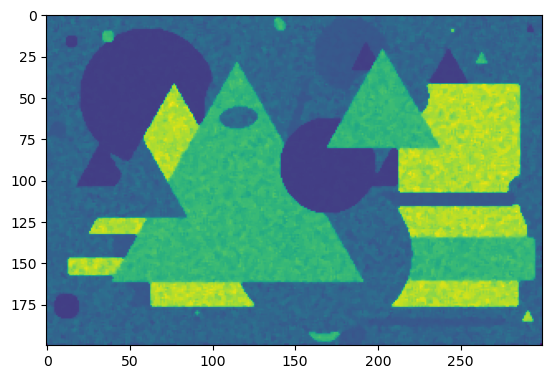

<Axes: >

In [4]:
show(img_ar1)

We will create a second image with the exact same parameters, but add change_pixels=10. For this case it is important that seed is set to the same value so the image is othwerwise identical.

In [5]:
sar_img2, _ = GeoMockImage(
    300,
    200,
    1,
    "uint16",
    out_dir=Path("."), 
    crs=4326,
    nodata=0,
    nodata_fill=0,
    cog=False,
).create(
    seed=3, noise_seed=5, noise_intensity=0.5, change_pixels=10
)

2024-05-21 13:12:44,438 - geomockimages.imagecreator - INFO - Now adding change pixels
2024-05-21 13:12:44,439 - geomockimages.imagecreator - DEBUG - r
2024-05-21 13:12:44,439 - geomockimages.imagecreator - DEBUG - d
2024-05-21 13:12:44,439 - geomockimages.imagecreator - DEBUG - r
2024-05-21 13:12:44,439 - geomockimages.imagecreator - DEBUG - d
2024-05-21 13:12:44,440 - geomockimages.imagecreator - DEBUG - d
2024-05-21 13:12:44,440 - geomockimages.imagecreator - DEBUG - r
2024-05-21 13:12:44,440 - geomockimages.imagecreator - DEBUG - l
2024-05-21 13:12:44,440 - geomockimages.imagecreator - DEBUG - u
2024-05-21 13:12:44,440 - geomockimages.imagecreator - DEBUG - d
2024-05-21 13:12:44,441 - geomockimages.imagecreator - DEBUG - d
2024-05-21 13:12:44,441 - geomockimages.imagecreator - INFO - [(195, 251), (195, 252), (194, 252), (194, 253), (193, 253), (192, 253), (192, 254), (192, 253), (193, 253), (192, 253), (191, 253)]
2024-05-21 13:12:44,441 - geomockimages.imagecreator - DEBUG - [(195

In [6]:
img2 = rio.open(sar_img2)
img_ar2 = img2.read([1])

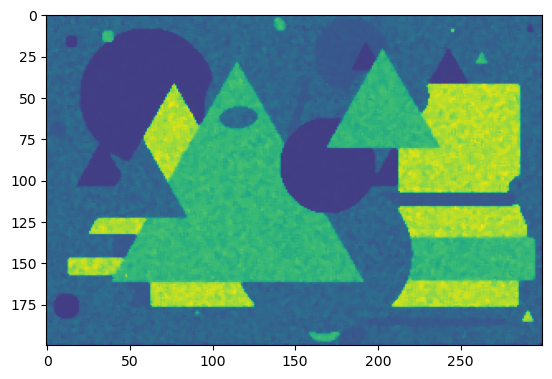

<Axes: >

In [7]:
show(img_ar2)

You can find a few pixels changed, but it is much easier to identify them using a difference image.

In [8]:
diff = img_ar2 - img_ar1

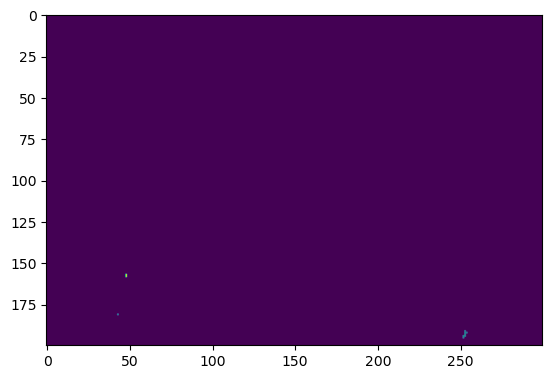

<Axes: >

In [9]:
show(diff)